In [213]:
import gensim.downloader
from gensim.models import Word2Vec
from pymorphy3 import MorphAnalyzer
import numpy as np
import matplotlib.pyplot as plt


In [4]:
print(list(gensim.downloader.info()['models'].keys()))
rus_vectors = gensim.downloader.load('word2vec-ruscorpora-300')

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [6]:
import nltk
import re
from nltk.corpus import stopwords

In [223]:
from matplotlib.cm import ScalarMappable

Предобработка

In [8]:
book = open('na_pervoe.txt', 'r').read().lower()
book_without_numbers = re.sub('[^а-яА-Я]', ' ', book)     #удаляю цифры и символы
book_without_whitespace = re.sub(r'\s+', ' ', book_without_numbers)

all_words = nltk.word_tokenize(book_without_whitespace)
morph = MorphAnalyzer()
token = [morph.normal_forms(el)[0] for el in all_words]  

stop = stopwords.words('russian')
cleaned_tokens = [word for word in token if not  word in stop]
tags = [cleaned_tokens]
print(tags)



[['фёдор', 'михаилович', 'достоевский', 'первый', 'июль', 'год', 'настать', 'вновь', 'русский', 'народ', 'эпоха', 'славный', 'жертва', 'двенадцатый', 'год', 'мать', 'отдать', 'царь', 'свой', 'сынов', 'благословить', 'брань', 'против', 'враг', 'облиться', 'земля', 'жертвенный', 'кровь', 'засиять', 'русь', 'геройство', 'любовь', 'раздаться', 'твой', 'тихий', 'скорбный', 'стон', 'остриё', 'меч', 'проникнуть', 'душа', 'беда', 'прозвучать', 'русский', 'час', 'смутиться', 'исполин', 'дрогнуть', 'первый', 'гаснуть', 'ввечеру', 'денница', 'синий', 'море', 'мир', 'отойти', 'супруг', 'великий', 'твой', 'веровать', 'русь', 'час', 'тоска', 'горе', 'блеснуть', 'новый', 'луч', 'надежда', 'золотой', 'свершиться', 'пред', 'благоговеть', 'уста', 'грешный', 'назвать', 'сметь', 'свидетель', 'немой', 'бессмертный', 'дело', 'сирый', 'семья', 'россия', 'зарыдать', 'испуг', 'ужас', 'хладеть', 'замереть', 'лишь', 'весь', 'большой', 'потерять', 'помнить', 'тяжёлый', 'смутный', 'час', 'достигнуть', 'ведать', 'у

In [9]:
word2vec = Word2Vec(tags, min_count=2)
vocabulary = word2vec.wv.key_to_index
print(vocabulary)

{'сердце': 0, 'твой': 1, 'простить': 2, 'свой': 3, 'сметь': 4, 'великий': 5, 'час': 6, 'живить': 7, 'дело': 8, 'русский': 9, 'пред': 10, 'мочь': 11, 'весь': 12, 'святой': 13, 'слеза': 14, 'немой': 15, 'тоска': 16, 'душа': 17, 'год': 18, 'ангел': 19, 'грядущий': 20, 'всё': 21, 'ужели': 22, 'ещё': 23, 'русь': 24, 'кровь': 25, 'супруг': 26, 'веровать': 27, 'меч': 28, 'луч': 29, 'земля': 30, 'враг': 31, 'скорбный': 32, 'благословить': 33, 'бессмертный': 34, 'мать': 35, 'славный': 36, 'любовь': 37, 'ясный': 38, 'око': 39, 'образ': 40, 'счастие': 41, 'меж': 42, 'наш': 43, 'восстать': 44, 'дух': 45, 'взглянуть': 46, 'забыть': 47, 'озарить': 48, 'провиденье': 49, 'жить': 50, 'жизнь': 51, 'грудь': 52, 'снова': 53, 'ниспослать': 54, 'бог': 55, 'могила': 56, 'сей': 57, 'унылый': 58, 'страдание': 59, 'питать': 60, 'говорить': 61, 'слово': 62, 'высказать': 63, 'сын': 64, 'горячий': 65, 'первый': 66}


In [10]:
vocabulary1 = word2vec.wv.index_to_key
print(vocabulary1)

['сердце', 'твой', 'простить', 'свой', 'сметь', 'великий', 'час', 'живить', 'дело', 'русский', 'пред', 'мочь', 'весь', 'святой', 'слеза', 'немой', 'тоска', 'душа', 'год', 'ангел', 'грядущий', 'всё', 'ужели', 'ещё', 'русь', 'кровь', 'супруг', 'веровать', 'меч', 'луч', 'земля', 'враг', 'скорбный', 'благословить', 'бессмертный', 'мать', 'славный', 'любовь', 'ясный', 'око', 'образ', 'счастие', 'меж', 'наш', 'восстать', 'дух', 'взглянуть', 'забыть', 'озарить', 'провиденье', 'жить', 'жизнь', 'грудь', 'снова', 'ниспослать', 'бог', 'могила', 'сей', 'унылый', 'страдание', 'питать', 'говорить', 'слово', 'высказать', 'сын', 'горячий', 'первый']


In [218]:
v1 = word2vec.wv['сердце']
v2 = word2vec.wv['тоска']
print(v1)


[-5.2410190e-04  2.5813319e-04  5.0702067e-03  8.9560058e-03
 -9.3030706e-03 -7.2027231e-03  6.4496496e-03  9.1311969e-03
 -5.0869086e-03 -3.8386898e-03  7.3967306e-03 -1.6158734e-03
 -4.5017716e-03  6.6163791e-03 -4.7793258e-03 -1.8522430e-03
  2.9133146e-03  9.8677678e-04 -8.2858354e-03 -9.6302098e-03
  7.3797088e-03  5.0801421e-03  6.8099452e-03  6.8958901e-04
  6.3246908e-03 -3.4452246e-03 -9.4626250e-04  5.7656472e-03
 -7.5505152e-03 -3.9157090e-03 -7.4709672e-03 -9.3364925e-04
  9.5930230e-03 -7.3768082e-03 -2.3553341e-03 -1.9142795e-03
  8.0553042e-03 -5.9224078e-03 -1.0769652e-06 -4.7733239e-03
 -9.5665613e-03  4.9488442e-03 -8.7378882e-03 -4.3457560e-03
  2.9860797e-05 -3.1730524e-04 -7.7242637e-03  9.5578898e-03
  4.9893251e-03  9.2423186e-03 -8.1024021e-03  4.4488991e-03
 -4.1695223e-03  7.4969471e-04  8.5395807e-03 -4.5139710e-03
  4.5722798e-03 -6.8317614e-03 -3.5634565e-03  9.4026709e-03
 -1.5921142e-03  2.2767736e-04 -4.0496103e-03 -7.6266713e-03
 -1.6167826e-03  2.64640

Визуализация слова-вектора: так можно увидеть, где именно сходство

In [271]:
def color(v):
    colormap = plt.cm.RdYlBu
    norm = plt.Normalize(vmin=-2, vmax=2)
    colors = np.array([colormap(norm(x)) for x in v.flatten()])
    vector_matrix = np.expand_dims(v, axis=0)

    # Визуализация
    plt.imshow(vector_matrix, cmap='RdYlBu', aspect='auto')
    plt.axis('off')  # Убрать оси
    plt.show()

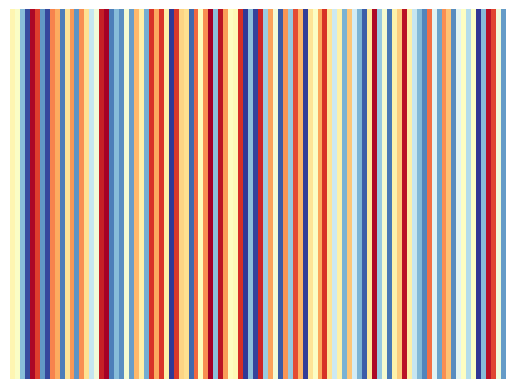

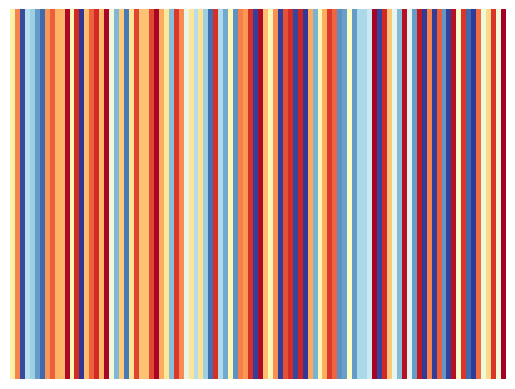

None None


In [272]:
a = color(v1)
b = color(v2)
print(a, b)

In [212]:
sim_words = word2vec.wv.most_similar('сердце', negative=[], topn=10, restrict_vocab=None)
print(*sim_words, sep='\n')


('тоска', 0.22091016173362732)
('русский', 0.21814648807048798)
('горячий', 0.20522461831569672)
('меч', 0.19805125892162323)
('снова', 0.17215901613235474)
('наш', 0.1719886064529419)
('земля', 0.154672309756279)
('бессмертный', 0.14871688187122345)
('сей', 0.14302578568458557)
('страдание', 0.1416395604610443)


Ищу аналогии всех ар со всеми словами

In [260]:
def analogy_all_words(tags):
    for k in range(len(tags)): 
        negative = tags[k] 
        for i in range(len(tags)-1):
            positive1 = tags[i]
            positive2 = tags[i+1]
            positive = [positive1, positive2]
            similar = word2vec.wv.most_similar(positive, negative, topn = 1)
            print(f"{positive1} - {positive2} --> {negative} - {similar}")  
        continue 

In [261]:
analogy_all_words(vocabulary1)

сердце - твой --> сердце - [('веровать', 0.18888172507286072)]
твой - простить --> сердце - [('год', 0.1886623501777649)]
простить - свой --> сердце - [('дух', 0.22863291203975677)]
свой - сметь --> сердце - [('великий', 0.18447117507457733)]
сметь - великий --> сердце - [('супруг', 0.19004511833190918)]
великий - час --> сердце - [('любовь', 0.2406841665506363)]
час - живить --> сердце - [('любовь', 0.3430989682674408)]
живить - дело --> сердце - [('ангел', 0.26374107599258423)]
дело - русский --> сердце - [('восстать', 0.2031453400850296)]
русский - пред --> сердце - [('первый', 0.17755264043807983)]
пред - мочь --> сердце - [('жизнь', 0.23025652766227722)]
мочь - весь --> сердце - [('любовь', 0.24102899432182312)]
весь - святой --> сердце - [('сметь', 0.25913068652153015)]
святой - слеза --> сердце - [('душа', 0.265558660030365)]
слеза - немой --> сердце - [('ещё', 0.2316141277551651)]
немой - тоска --> сердце - [('питать', 0.21180063486099243)]
тоска - душа --> сердце - [('слеза', 

Попробую найти аналогии к паре близких слов, а не к любой паре слов из текста.

In [249]:
def analogy_with_most_similar_words(tags):
    for i in range(len(tags)):
        positive_1 = tags[i]
        most_similar_positive = word2vec.wv.most_similar(positive_1)
        for j in range(len(most_similar_positive)):
            positive_2 = most_similar_positive[j]
            positive = [positive_1, positive_2] 
        for k in range(len(tags)):
            negative = tags[k]                                                 
            similar = word2vec.wv.most_similar(positive, negative, topn=1)
            print(f"{tags[i]} - {most_similar_positive[j]} --> {negative} - {similar}")    

In [250]:
answer = analogy_with_most_similar_words(vocabulary1)

сердце - ('страдание', 0.1416395604610443) --> сердце - [('живить', 0.1998063176870346)]
сердце - ('страдание', 0.1416395604610443) --> твой - [('русский', 0.22247184813022614)]
сердце - ('страдание', 0.1416395604610443) --> простить - [('снова', 0.22924894094467163)]
сердце - ('страдание', 0.1416395604610443) --> свой - [('тоска', 0.3342078626155853)]
сердце - ('страдание', 0.1416395604610443) --> сметь - [('снова', 0.30152085423469543)]
сердце - ('страдание', 0.1416395604610443) --> великий - [('меч', 0.27952128648757935)]
сердце - ('страдание', 0.1416395604610443) --> час - [('снова', 0.19738909602165222)]
сердце - ('страдание', 0.1416395604610443) --> живить - [('русский', 0.23592513799667358)]
сердце - ('страдание', 0.1416395604610443) --> дело - [('тоска', 0.2586364150047302)]
сердце - ('страдание', 0.1416395604610443) --> русский - [('грудь', 0.2249630093574524)]
сердце - ('страдание', 0.1416395604610443) --> пред - [('веровать', 0.22737671434879303)]
сердце - ('страдание', 0.14

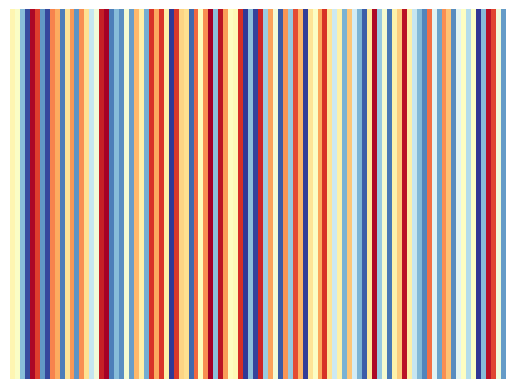

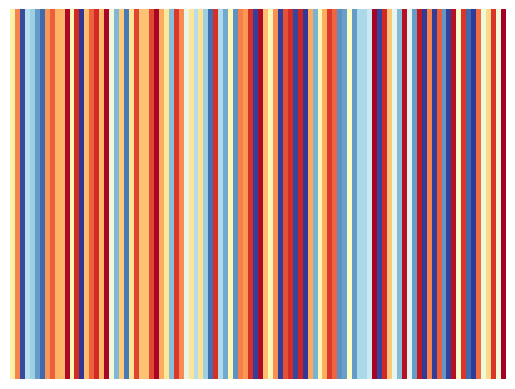

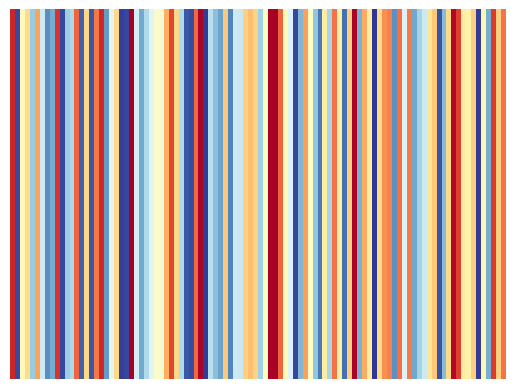

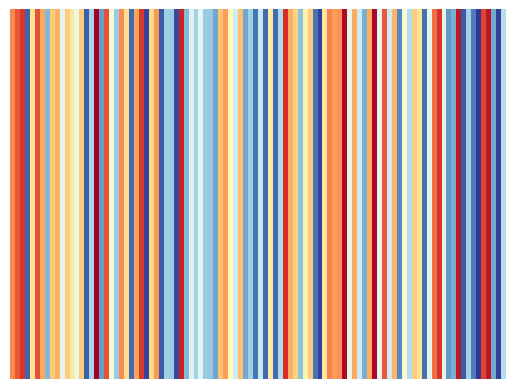

None None None None


In [263]:
v1 = word2vec.wv['сердце']
v2 = word2vec.wv['страдание']
v3 = word2vec.wv['свой']
v4 = word2vec.wv['русский']
print(color(v1), color(v2), color(v3), color(v4))

В данном примере можно найти сходства, но они небольшие, поэтому лишь несколько цветовых линий совпадают